<a href="https://colab.research.google.com/github/mohammedbadran5/az.html/blob/main/whats_cookin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WHAT'S COOKIN

##### 1. About the dataset:
The dataset included ingredients from cuisines all over the region. No information on the dishes name and recipe. Only where it comes from and the ingredients.
##### 2. The purpose:
The original purpose of competition in Kaggle using this dataset is to create model for determining where the dishes come from just based on the ingredients.
##### 3. In this notebook:
At the end there will be model to determine dishes just based on the ingredients. However along the way, it will also ravel how geographical placement and history affect food ingredients across the region

### Module

In [53]:
!pip install wordcloud

In [54]:
import json #--> to open the data since it is in json form
import pandas as pd #--> EDA
## below are for doing NLP on the ingredients and creating the model
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import SGDClassifier
from nltk.stem import WordNetLemmatizer
import nltk
import re
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import csv
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

### Exploratory Data Analysis

In [55]:
import pandas as pd


train_data = pd.read_excel('/content/drive/MyDrive/new_output.xlsx')

print(train_data)



                                                   Title  \
0                        Crispy Salt and Pepper Potatoes   
1                            Thanksgiving Mac and Cheese   
2                     Italian Sausage and Bread Stuffing   
3                                           Newton's Law   
4                                           Warm Comfort   
5                                     Apples and Oranges   
6                                     Turmeric Hot Toddy   
7                                Instant Pot Lamb Haleem   
8         Spiced Lentil and Caramelized Onion Baked Eggs   
9                                 Hot Pimento Cheese Dip   
10                         Spiral Ham in the Slow Cooker   
11                       Butternut Squash and Apple Soup   
12                            Caesar Salad Roast Chicken   
13           Chicken and Rice With Leeks and Salsa Verde   
14                                Gorditas con Camarones   
15                                      

In [56]:
print(train_data.columns)


Index(['Title', 'cleaned_text'], dtype='object')


In [69]:








import pandas as pd


train_data = pd.read_excel('/content/drive/MyDrive/new_output.xlsx')
num_rows = train_data.shape[0]

print("Number of rows:", num_rows)



Number of rows: 13461


In [58]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
print(type(train_data))

<class 'pandas.core.frame.DataFrame'>


In [71]:
print(train_data)

                                                   Title  \
0                        Crispy Salt and Pepper Potatoes   
1                            Thanksgiving Mac and Cheese   
2                     Italian Sausage and Bread Stuffing   
3                                           Newton's Law   
4                                           Warm Comfort   
5                                     Apples and Oranges   
6                                     Turmeric Hot Toddy   
7                                Instant Pot Lamb Haleem   
8         Spiced Lentil and Caramelized Onion Baked Eggs   
9                                 Hot Pimento Cheese Dip   
10                         Spiral Ham in the Slow Cooker   
11                       Butternut Squash and Apple Soup   
12                            Caesar Salad Roast Chicken   
13           Chicken and Rice With Leeks and Salsa Verde   
14                                Gorditas con Camarones   
15                                      

In [74]:
# for x in range(len(train_data)):
#     print(train_data[x]['id'])

In [76]:
df = pd.DataFrame(train_data, columns =['Title', 'cleaned_text'], dtype = object)
df

Title  \
0                        Crispy Salt and Pepper Potatoes   
1                            Thanksgiving Mac and Cheese   
2                     Italian Sausage and Bread Stuffing   
3                                           Newton's Law   
4                                           Warm Comfort   
5                                     Apples and Oranges   
6                                     Turmeric Hot Toddy   
7                                Instant Pot Lamb Haleem   
8         Spiced Lentil and Caramelized Onion Baked Eggs   
9                                 Hot Pimento Cheese Dip   
10                         Spiral Ham in the Slow Cooker   
11                       Butternut Squash and Apple Soup   
12                            Caesar Salad Roast Chicken   
13           Chicken and Rice With Leeks and Salsa Verde   
14                                Gorditas con Camarones   
15                                          Enfrijoladas   
16                          Caramelized Plantain Parfait   
17     Chicken and Potato Gratin With Brown Butter Cream   
18     Roasted Beets With Crispy Sunchokes and Pickle...   
19     Kale and Pumpkin Falafels With Pickled Carrot ...   
20     Maple and Chile Roasted Squash With Quinoa Tab...   
21                       Chhena Poda (Spiced Cheesecake)   
22                                                Paneer   
23                  Sloppy Joe Shirred Eggs With Spinach   
24                                        R-Rated Onions   
25                                     Miso-Squash Ramen   
26                            Spicy Coconut Pumpkin Soup   
27                                         Baigan Chokha   
28                                 Dad’s Curried Chicken   
29                                 Trinidad Curry Powder   
30                                         Shrimp Creole   
31                                       Green Seasoning   
32                                         Chicken Pelau   
33                   Our Favorite Creamy Mashed Potatoes   
34                                  Remember the Alimony   
35     Creole Cream Cheesecake With Caramel-Apple Top...   
36                                   Creole Cream Cheese   
37                           Buss Up Shut (Paratha Roti)   
38                                     Best Deviled Eggs   
39                                           Mango Curry   
40                                     Iced Café de Olla   
41                Pumpkin Dutch Baby With Pumpkin Butter   
42           Braised Chicken Legs With Grapes and Fennel   
43                      Old-Fashioned Scalloped Potatoes   
44                       Yogurt and Spice Roasted Salmon   
45                                                  Pita   
46                              Veselka's Famous Borscht   
47     Papaya-and-Cubeb-Marinated Snapper With Baked ...   
48       Drunk Apricot Shito (Ghanaian Hot Pepper Sauce)   
49             Summer Bean Soup With Tomato Brown Butter   
50                                   Tomato Brown Butter   
51                            Maple-Roasted Acorn Squash   
52                       Coconut-Creamed Corn and Grains   
53                         Tomato and Roasted Garlic Pie   
54                 Paneer With Burst Cherry Tomato Sauce   
55                         Sesame-Scallion Chicken Salad   
56                        Maple Barbecue Grilled Chicken   
57                     Spiced Lamb and Dill Yogurt Pasta   
58                                  Salt-and-Pepper Fish   
59     Salmon Burgers With Ginger and Quick-Pickled C...   
60                                  Fish Tacos al Pastor   
61                               Nut Butter Granola Bars   
62           Zucchini-Lentil Fritters With Lemony Yogurt   
63                                          Fried Onions   
64                     Sour Cream and Onion Potato Salad   
65                                      Tropi-Cobb Salad   
66                     Pork Mea

In [77]:
df['cleaned_text'] = [','.join(map(str, l)) for l in df['cleaned_text']]

#### List of cuisine origin region and data amount for each

<Axes: xlabel='Title'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 146 (\x92) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/

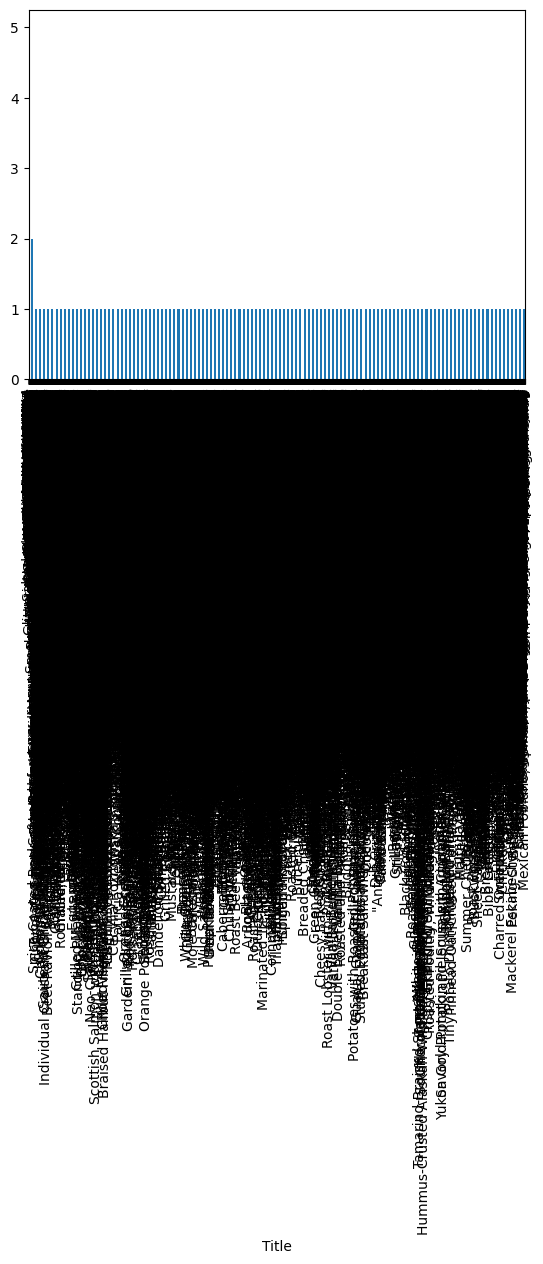

In [79]:
df.Title.value_counts()
df.Title.value_counts().plot.bar()

In [82]:
Maple = df[df.Title == 'Maple']
Creamed  = df[df.Title == 'Creamed']
Yogurt = df[df.Title == 'Yogurt']
milk= df[df.Title == 'milk']
onion = df[df.Title == 'onion']
garlic = df[df.Title == 'garlic']
sugar = df[df.Title == 'sugar']
oliv = df[df.Title == 'oliv']
boneless = df[df.Title == 'boneless']
seed = df[df.Title == 'seed']


#### Frequently used ingredients in all cuisine

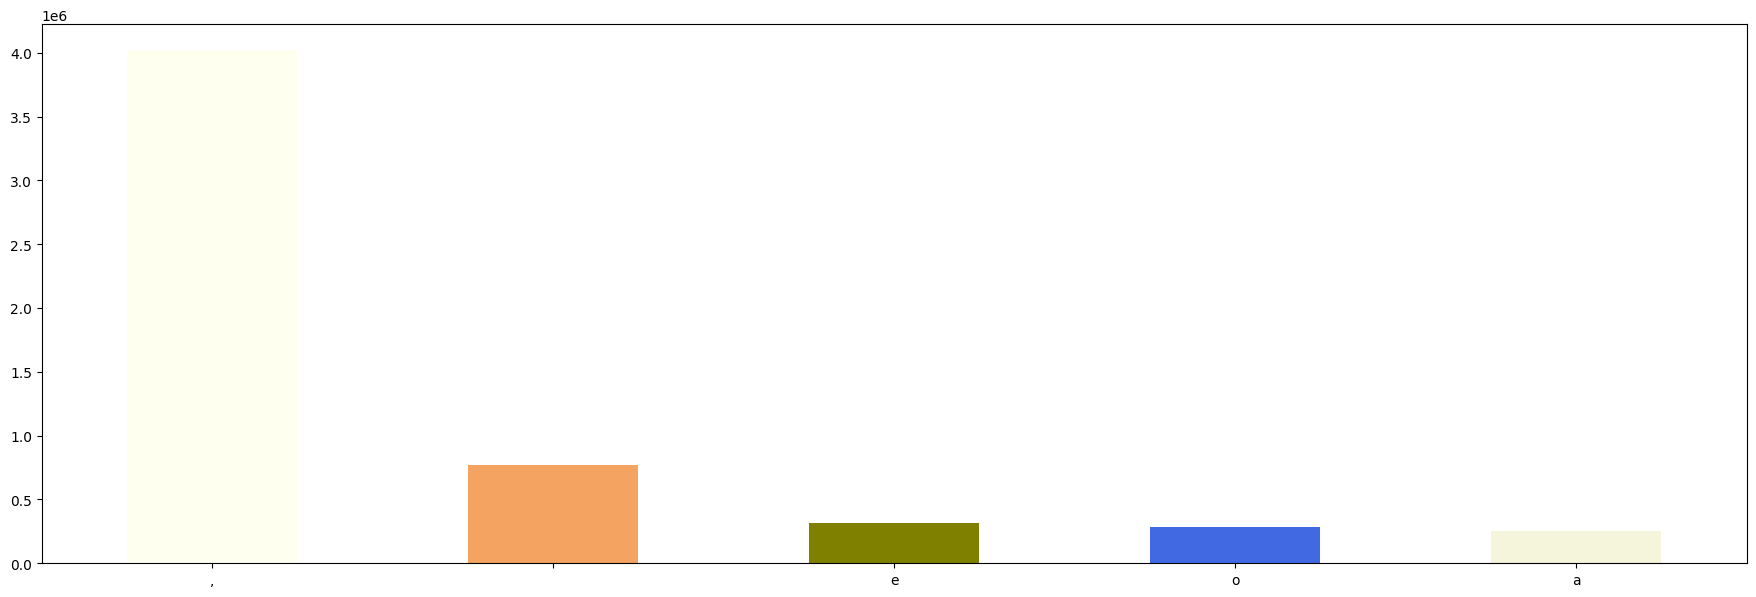

In [84]:
fig, ax = plt.subplots(figsize=(22,7))
ing_list = []
for x in df['cleaned_text']:
    for y in x:
        ing_list.append(y)

ing_list = pd.Series(ing_list)
ing_list.value_counts().sort_values(ascending=False).head(5).plot.bar(ax=ax, color =['#FFFFF0','#F4A460','#808000','#4169E1','#F5F5DC'])
ax.tick_params(axis='x',rotation=360)

In [89]:
!pip install Pillow

In [99]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Specify the path to the image file (replace '...' with the copied path)
image_path = '/content/drive/MyDrive/il_570xN.2887363835_9sru.avif'

# Open the image file using PIL
food_mask = np.array(Image.open(image_path))

# Create the WordCloud using the image mask
wc = WordCloud(background_color="white", max_words=15, mask=food_mask,
               contour_width=3, contour_color='gray')

# Generate the WordCloud
wc.generate(wordtext)

# Display the WordCloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


UnidentifiedImageError: cannot identify image file '/content/drive/MyDrive/il_570xN.2887363835_9sru.avif'

In [100]:
!pip install matplotlib

In [109]:
from google.colab import files
from PIL import Image

# Mount Google Drive if you haven't done so already
from google.colab import drive
drive.mount('/content/drive')

# Upload an image file from your local "C" drive
uploaded = files.upload()
uploaded_file = list(uploaded.keys())[0]
image_path = '/content/'+uploaded_file

# Alternatively, you can use an image file from your Google Drive
image_path = '/content/drive/MyDrive/il_570xN.2887363835_9sru.avif'

# Open the image file
img = Image.open(image_path)

# Display the image
img.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving il_570xN.2887363835_9sru.avif to il_570xN.2887363835_9sru (6).avif


UnidentifiedImageError: cannot identify image file '/content/drive/MyDrive/il_570xN.2887363835_9sru.avif'

#### Frequently used ingredients in each region cuisine:
The ingredients listed already exclude frequently used ingredients across all region cuisine such as salt, onions, water, garlic and sugar. Olive oil is considered to be included since it is more commonly used in european especially italian dishes. Since the data on italian food is bigger in amount compare than others, the result above might be influnce by that fact.

In [ ]:
frequent = ['salt','water','sugar','extra-virgin olive oil','unsalted butter','salted butter','garlic','onions', 'garlic cloves']
ing_list = {}

brazil_ing_list = []
for x in brazilian['ingredients']:
    for y in x:
        if y not in frequent:
            brazil_ing_list.append(y)

brazil_ing_list = pd.Series(brazil_ing_list)
brazil_ing_list = brazil_ing_list.value_counts().sort_values(ascending=False).head(5)
brazil = {'brazil' : brazil_ing_list.index.tolist()}
ing_list.update(brazil)
brazil_ing_list

In [ ]:
british_ing_list = []
for x in british['ingredients']:
    for y in x:
        if y not in frequent:
            british_ing_list.append(y)

british_ing_list = pd.Series(british_ing_list)
british_ing_list = british_ing_list.value_counts().sort_values(ascending=False).head(5)
british = {'british' : british_ing_list.index.tolist()}
british_ing_list

In [ ]:
ing_list.update(british)

In [ ]:
cajun_ing_list = []
for x in cajun_creole['ingredients']:
    for y in x:
        if y not in frequent:
            cajun_ing_list.append(y)

cajun_ing_list = pd.Series(cajun_ing_list)
cajun_ing_list = cajun_ing_list.value_counts().sort_values(ascending=False).head(5)
cajun = {'cajun' : cajun_ing_list.index.tolist()}
ing_list.update(cajun)
cajun_ing_list

In [ ]:
chinese_ing_list = []
for x in chinese['ingredients']:
    for y in x:
        if y not in frequent:
            chinese_ing_list.append(y)

chinese_ing_list = pd.Series(chinese_ing_list)
chinese_ing_list = chinese_ing_list.value_counts().sort_values(ascending=False).head(5)
chinese = {'chinese' : chinese_ing_list.index.tolist()}
ing_list.update(chinese)
chinese_ing_list

In [ ]:
filipino_ing_list = []
for x in filipino['ingredients']:
    for y in x:
        if y not in frequent:
            filipino_ing_list.append(y)

filipino_ing_list = pd.Series(filipino_ing_list)
filipino_ing_list = filipino_ing_list.value_counts().sort_values(ascending=False).head(5)
filipino = {'filipino' : filipino_ing_list.index.tolist()}
ing_list.update(filipino)
filipino_ing_list

In [ ]:
french_ing_list = []
for x in french['ingredients']:
    for y in x:
        if y not in frequent:
            french_ing_list.append(y)

french_ing_list = pd.Series(french_ing_list)
french_ing_list = french_ing_list.value_counts().sort_values(ascending=False).head(5)
french = {'french' : french_ing_list.index.tolist()}
ing_list.update(french)
french_ing_list

In [ ]:
greek_ing_list = []
for x in greek['ingredients']:
    for y in x:
        if y not in frequent:
            greek_ing_list.append(y)

greek_ing_list = pd.Series(greek_ing_list)
greek_ing_list = greek_ing_list.value_counts().sort_values(ascending=False).head(5)
greek = {'greek' : greek_ing_list.index.tolist()}
ing_list.update(greek)
greek_ing_list

In [ ]:
irish_ing_list = []
for x in irish['ingredients']:
    for y in x:
        if y not in frequent:
            irish_ing_list.append(y)

irish_ing_list = pd.Series(irish_ing_list)
irish_ing_list = irish_ing_list.value_counts().sort_values(ascending=False).head(5)
irish = {'irish' : irish_ing_list.index.tolist()}
ing_list.update(irish)
irish_ing_list

In [ ]:
italian_ing_list = []
for x in italian['ingredients']:
    for y in x:
        if y not in frequent:
            italian_ing_list.append(y)

italian_ing_list = pd.Series(italian_ing_list)
italian_ing_list = italian_ing_list.value_counts().sort_values(ascending=False).head(5)
italian = {'italian' : italian_ing_list.index.tolist()}
ing_list.update(italian)
italian_ing_list

In [ ]:
jamaican_ing_list = []
for x in jamaican['ingredients']:
    for y in x:
        if y not in frequent:
            jamaican_ing_list.append(y)

jamaican_ing_list = pd.Series(jamaican_ing_list)
jamaican_ing_list = jamaican_ing_list.value_counts().sort_values(ascending=False).head(5)
jamaican = {'jamaican' : jamaican_ing_list.index.tolist()}
ing_list.update(jamaican)
jamaican_ing_list

In [ ]:
japanese_ing_list = []
for x in japanese['ingredients']:
    for y in x:
        if y not in frequent:
            japanese_ing_list.append(y)

japanese_ing_list = pd.Series(japanese_ing_list)
japanese_ing_list = japanese_ing_list.value_counts().sort_values(ascending=False).head(5)
japanese = {'japanese' : japanese_ing_list.index.tolist()}
ing_list.update(japanese)
japanese_ing_list

In [ ]:
korean_ing_list = []
for x in korean['ingredients']:
    for y in x:
        if y not in frequent:
            korean_ing_list.append(y)

korean_ing_list = pd.Series(korean_ing_list)
korean_ing_list = korean_ing_list.value_counts().sort_values(ascending=False).head(5)
korean = {'korean' : korean_ing_list.index.tolist()}
ing_list.update(korean)
korean_ing_list

In [ ]:
mexican_ing_list = []
for x in mexican['ingredients']:
    for y in x:
        if y not in frequent:
            mexican_ing_list.append(y)

mexican_ing_list = pd.Series(mexican_ing_list)
mexican_ing_list = mexican_ing_list.value_counts().sort_values(ascending=False).head(5)
mexican = {'mexican' : mexican_ing_list.index.tolist()}
ing_list.update(mexican)
mexican_ing_list

In [ ]:
moroccan_ing_list = []
for x in moroccan['ingredients']:
    for y in x:
        if y not in frequent:
            moroccan_ing_list.append(y)

moroccan_ing_list = pd.Series(moroccan_ing_list)
moroccan_ing_list = moroccan_ing_list.value_counts().sort_values(ascending=False).head(5)
moroccan = {'moroccan' : moroccan_ing_list.index.tolist()}
ing_list.update(moroccan)
moroccan_ing_list

In [ ]:
russian_ing_list = []
for x in russian['ingredients']:
    for y in x:
        if y not in frequent:
            russian_ing_list.append(y)

russian_ing_list = pd.Series(russian_ing_list)
russian_ing_list = russian_ing_list.value_counts().sort_values(ascending=False).head(5)
russian = {'russian' : russian_ing_list.index.tolist()}
ing_list.update(russian)
russian_ing_list

In [ ]:
southern_us_ing_list = []
for x in southern_us['ingredients']:
    for y in x:
        if y not in frequent:
            southern_us_ing_list.append(y)

southern_us_ing_list = pd.Series(southern_us_ing_list)
southern_us_ing_list = southern_us_ing_list.value_counts().sort_values(ascending=False).head(5)
southern_us = {'southern_us' : southern_us_ing_list.index.tolist()}
ing_list.update(southern_us)
southern_us_ing_list

In [ ]:
spanish_ing_list = []
for x in spanish['ingredients']:
    for y in x:
        if y not in frequent:
            spanish_ing_list.append(y)

spanish_ing_list = pd.Series(spanish_ing_list)
spanish_ing_list = spanish_ing_list.value_counts().sort_values(ascending=False).head(5)
spanish = {'spanish' : spanish_ing_list.index.tolist()}
ing_list.update(spanish)
spanish_ing_list


In [ ]:
thai_ing_list = []
for x in thai['ingredients']:
    for y in x:
        if y not in frequent:
            thai_ing_list.append(y)

thai_ing_list = pd.Series(thai_ing_list)
thai_ing_list = thai_ing_list.value_counts().sort_values(ascending=False).head(5)
thai = {'thai' : thai_ing_list.index.tolist()}
ing_list.update(thai)
thai_ing_list


In [ ]:
vietnamese_ing_list = []
for x in vietnamese['ingredients']:
    for y in x:
        if y not in frequent:
            vietnamese_ing_list.append(y)

vietnamese_ing_list = pd.Series(vietnamese_ing_list)
vietnamese_ing_list = vietnamese_ing_list.value_counts().sort_values(ascending=False).head(5)
vietnamese = {'vietnamese' : vietnamese_ing_list.index.tolist()}
ing_list.update(vietnamese)
vietnamese_ing_list

### Edited dataset
The edited dataset is for a more balance amount of cuisine from each region and in order to decrease burden on machine.

In [ ]:
df_edit= pd.read_csv("cuisine_data_edited.csv")

In [ ]:
df_edit.cuisine.value_counts().plot.bar()

In [ ]:
len(df_edit)

### Preprocessing data for NLP analysis:
For this problem, NLP is used. Basically the approach for this case will be determining how often several ingredients used in a cuisine from certain region. The ingredients information itself is in form of words. Hence, NLP is suitable to calculate ingredients matrix.
The pre-processing include:
1. Deleting certain words (crushed, crumble, ground). The ingredients in dataset also included processing description such as crushed, crumbles, ground etc which will affect the categorizing. Same ingredients such as garlic and crushed garlic will be categorized differently.
2. Lowering the character

The more usual technique for NLP such as lemmatization is not included since most of the word in ingredients is in their original form.

In [ ]:
ingredients_list = []
for i in range(len(df_edit)-1):
    ings = re.sub(r'\(.*oz.\)|crushed|crumbles|ground|minced|chopped|sliced|dried|all-purpose|extra|salted|unsalted',' ', df_edit['ingredients_string'][i])
    ings = re.sub(' ','',ings)
    ings = ings.lower()
    df_edit['ingredients_string'][i] = ings

In [ ]:
df_edit

#### TF-IDF
Term Frequency - Inverse Document Frequency = Is a technique to quantify words in set of document.
The formula:
TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)
tf-idf(t,d) = tf(t,d) * log(N/(df+1))
t - term (word)
d - document (set of words)
N - count of corpus
corpus - total set of documents

In this context, the amount of ingredients will be the term(word) counted while recipes count of documents.This way we will measure how importants an ingredients(word) in dished from a region(document)

In [ ]:
tfid = TfidfVectorizer()

In [ ]:
X = tfid.fit_transform(df_edit["ingredients_string"].tolist())
y = df_edit.cuisine.astype("category").cat.codes

#### PCA
Principal Component Analysis is a dimensionality reduction method that usually used when data correlated with each other. In this case, we would like to see the mapping of cuisine to each other from different geographic area. For this, I've only selected a representation for each area. Southern_us represent north america, italian represent Europe, Chinese represent East Asian, Moroccan represent Africa and Brazilian represent south america.

In [ ]:
cuisine_name_list = df_edit.cuisine.astype("category").cat.categories
cuisine_subset = ['southern_us','italian','chinese','moroccan','brazilian']
# 'indian','chinese','thai','japanese','korean','vietnamese','moroccan','filipino'
# 'southern_us','spanish','chinese','moroccan','jamaican'
# italian,mexican,southern_us,indian,chinese,french,cajun_creole,thai,japanese,greek,spanish,korean,vietnamese,moroccan,british,filipino,irish,jamaican,russian,brazilian
subset = df_edit.cuisine.apply(lambda x: x in cuisine_subset)
X_subset, y_subset = X[subset], y[subset]

In [ ]:
kpca = KernelPCA(n_components=2, kernel='cosine')
x_pca = kpca.fit_transform(X_subset)
x_pca.shape

In [ ]:
plot_pca = pd.DataFrame(data = x_pca[:,:2], columns = ["PC1","PC2"])
plot_pca["Cuisine"] = cuisine_name_list[y_subset].tolist()
sns.lmplot("PC1", "PC2", data = plot_pca, palette = "Paired",legend=True, hue = "Cuisine", fit_reg = False)

From graph above, a rough image of how a cuisine diverge or closer from each other in terms of ingredient could be seen. It is quite unique that moroccah, southern US and Brazillian cuisine shared a lot of ingredients with Italian cuisine at some points. If using only informations on above section on what ingredients are commonly used, italian, brazilian and moroccan dishes uses olive oil frequently.  While a commonly shared ingredients between Southern US and Italian food is butter. It would be interesting to see how cultural exchange happen between this country and how it affects each of their cuisine. Or maybe it has to do with how easy it is to get an olive oil in those regions. As for Chinese, it is the most diverge one from the other.

#### K-means neighboring


In [ ]:
true_k = 2
model = KMeans(n_clusters=3)
label = model.fit_predict(x_pca)
label

In [ ]:
#filter rows of original data
x_pca_label0 = x_pca[label == 0]
x_pca_label1 = x_pca[label == 1]
x_pca_label2 = x_pca[label == 2]
#plotting the results
plt.scatter(x_pca_label0[:,0] , x_pca_label0[:,1], color='blue')
plt.scatter(x_pca_label1[:,0] , x_pca_label1[:,1], color='red')
plt.scatter(x_pca_label2[:,0] , x_pca_label2[:,1], color='orange')
plt.show()

## Modelling

#### Splitting training and test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(y_train.shape)

### Multinomial Bayes Classifier
The matrix from TF-IDF use as an input into Multinomial Bayes Classifier method. Naive Bayes is a probabilistic approach for constructing data classification model. It is commonly used in Natural Language Processing. Bayes classifier will categorized by calculating probability by using the amount of certain text. Using TF-IDF could improve this model since TF-IDF give more wieght on more frequently used words.

In [ ]:
bayes = MultinomialNB()

In [ ]:
bayes.fit(X_train, y_train)

In [ ]:
y_pred = bayes.predict(X_test)

In [ ]:
y_pred_list = y_pred.tolist()
y_test
df_pred_test = pd.DataFrame({'prediction':y_pred_list, 'test':y_test})
df_pred_test.head(10)

In [ ]:
print(classification_report(y_test, y_pred))

### Random Forest
Random forest is a method of producing a single result from multiple trees. The output of random forest is the class selected by most trees

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

In [ ]:
y_pred_clf = clf.predict(X_test)

In [ ]:
y_pred_clf_list = y_pred_clf.tolist()
df_pred_test = pd.DataFrame({'prediction':y_pred_clf_list, 'test':y_test})
df_pred_test.head(10)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
ing_list['french']

In [ ]:
 ingredients_list = ['brazil','british','cajun','chinese','filipino','french','greek','irish','italian','jamaican','japanese','korean','mexican','moroccan','russian','southern_us','spanish','thai','vietnamese']

 with open('tableau_ingredients.csv', 'w') as csvfile:
     writer = csv.DictWriter(csvfile,fieldnames=ingredients_list)
    writer.writeheader()
     writer.writerows(ing_list)
ing_list.keys()